## Dataset Analysis

In [101]:
import pandas as pd
df = pd.read_csv("../data/combined.csv")
df.head()

,label,Text
0,backhand_index_pointing_right,@KeplerHomes AirdropBox event for #Arbitrum ec...
1,backhand_index_pointing_right,"Remember, success in online business is a mara..."
2,backhand_index_pointing_right,@occupied_9 @Rhiannon_clare_ @FightHaven Thank...
3,backhand_index_pointing_right,Hungry for active mutuals? Follow fastest Retw...
4,backhand_index_pointing_right,It's confirmed. Whitelist for Shardeum Airdro...


### Data Cleaning

In [102]:
df.rename(columns={"Text": "text"}, inplace=True)


In [103]:
print(df.info())
print(df.isna().sum())
print(df.duplicated(subset=["text", "label"]).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800027 entries, 0 to 800026
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   800027 non-null  object
 1   text    800027 non-null  object
dtypes: object(2)
memory usage: 12.2+ MB
None
label    0
text     0
dtype: int64
9178


In [104]:
import re
url_pattern = r"http\S+|www\S+|https\S+"
mention_pattern = r"@\w+"
hashtag_pattern = r"#\w+"

df["text"] = df["text"].apply(lambda x: re.sub(f"{url_pattern}|{mention_pattern}|{hashtag_pattern}", "", x))

In [105]:
import html
df["text"] = df["text"].apply(lambda x: html.unescape(x))

In [106]:
df.head()

,label,text
0,backhand_index_pointing_right,AirdropBox event for ecological users is her...
1,backhand_index_pointing_right,"Remember, success in online business is a mara..."
2,backhand_index_pointing_right,Thanks for the update the sh*t country the ...
3,backhand_index_pointing_right,Hungry for active mutuals? Follow fastest Retw...
4,backhand_index_pointing_right,It's confirmed. Whitelist for Shardeum Airdro...


In [107]:
from emoji import EMOJI_DATA
name_to_emoji = {}
for e, data in EMOJI_DATA.items():
    name = data.get("en", "").strip(":")  # e.g. ":grinning_face:" → "grinning_face"
    if name:
        name_to_emoji[name] = e
df["emoji_char"] = df["label"].map(name_to_emoji)
unique_labels = sorted(df["label"].unique())
label_to_id = {label: idx for idx, label in enumerate(unique_labels)}

df["label_id"] = df["label"].map(label_to_id)
df.head()

,label,text,emoji_char,label_id
0,backhand_index_pointing_right,AirdropBox event for ecological users is her...,👉,0
1,backhand_index_pointing_right,"Remember, success in online business is a mara...",👉,0
2,backhand_index_pointing_right,Thanks for the update the sh*t country the ...,👉,0
3,backhand_index_pointing_right,Hungry for active mutuals? Follow fastest Retw...,👉,0
4,backhand_index_pointing_right,It's confirmed. Whitelist for Shardeum Airdro...,👉,0


#### Text Length

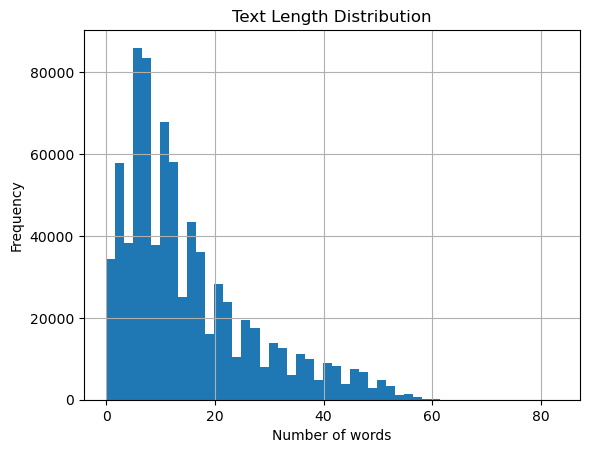

In [108]:
df["text_len"] = df["text"].str.split().apply(len)
df["text_len"].describe(percentiles=[.25, .5, .75, .9, .95])

import matplotlib.pyplot as plt
df["text_len"].hist(bins=50)
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.title("Text Length Distribution")
plt.show()

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_len = (
    df.groupby(["label_id", "label", "emoji_char"])["text"]
      .apply(lambda x: x.str.split().apply(len).mean())
      .reset_index(name="avg_len")
      .sort_values("avg_len", ascending=False)
)
avg_len.head()

,label_id,label,emoji_char,avg_len
0,0,backhand_index_pointing_right,👉,21.407740
23,23,pile_of_poo,💩,20.359900
2,2,check_mark_button,✅,19.891150
1,1,check_mark,✔,18.333933
36,36,thinking_face,🤔,17.931250


#### Word Frequency

In [110]:
from collections import Counter
from itertools import chain
from nltk.corpus import stopwords
import nltk

# Download stopwords once
nltk.download("stopwords")

# Get English stopwords
stop_words = set(stopwords.words("english"))

# Tokenize and flatten
all_words = list(chain.from_iterable(df["text"].str.split()))

# Remove stopwords and short tokens
filtered_words = [w.lower() for w in all_words if w.lower() not in stop_words and len(w) > 1]

# Count most common
common_words = Counter(filtered_words).most_common(30)
print(common_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brendaz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('like', 52195), ('happy', 49720), ('easter', 37575), ('get', 35079), ('one', 34282), ('love', 33592), ('good', 32709), ('day', 28114), ('thank', 26560), ('i’m', 26186), ('see', 24662), ('know', 24593), ('time', 23057), ('it’s', 21734), ('go', 19526), ('people', 19392), ('got', 18734), ('would', 17885), ('much', 17647), ('hope', 17482), ('want', 17029), ('really', 16878), ('even', 16836), ('don’t', 16684), ('make', 16403), ('back', 16278), ('think', 16047), ('new', 15747), ('need', 15573), ('still', 15501)]


In [111]:
emoji_map = (
    df[["label_id", "label", "emoji_char"]]
    .drop_duplicates()
    .sort_values("label_id")
    .reset_index(drop=True)
)

emoji_map

,label_id,label,emoji_char
0,0,backhand_index_pointing_right,👉
1,1,check_mark,✔
2,2,check_mark_button,✅
3,3,clown_face,🤡
4,4,cooking,🍳
5,5,enraged_face,😡
6,6,eyes,👀
7,7,face_holding_back_tears,🥹
8,8,face_savoring_food,😋
9,9,face_with_steam_from_nose,😤


In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer

def top_tfidf_terms_for_label(label_id, n=20):
    subset = df[df["label_id"] == label_id]["text"]
    tfidf = TfidfVectorizer(max_features=5000, stop_words="english")
    X = tfidf.fit_transform(subset)
    means = X.mean(axis=0).A1
    return pd.Series(means, index=tfidf.get_feature_names_out()).sort_values(ascending=False).head(n)

top_tfidf_terms_for_label(3)


like      0.015429
just      0.015024
don       0.013717
clown     0.013278
people    0.011603
know      0.010635
right     0.008531
think     0.007572
did       0.007474
say       0.006870
time      0.006502
lol       0.006495
clowns    0.006357
really    0.006301
good      0.006110
day       0.006007
got       0.005931
look      0.005811
make      0.005753
want      0.005693
dtype: float64

In [113]:
df[df["text"].str.contains(r"\beaster\b", case=False)].sample(5)[["text", "label", "emoji_char"]]


,text,label,emoji_char
487445,Plzzzz Keep The Happy Easter Text . I Hate Shi...,red_heart,❤
260828,Happy Easter Joel. God Bless you recover to g...,folded_hands,🙏
329341,Thank you my friend and a happy Easter to y...,hatching_chick,🐣
330516,Happy Easter,hatching_chick,🐣
600625,Happy Easter Madison,smiling_face_with_heart-eyes,😍


In [114]:
df.to_csv("../data/cleaned.csv")

In [116]:
len(df["label_id"].unique())

40

In [117]:
df.shape

(800027, 5)